In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [169]:
# df['spec_no'] = LabelEncoder().fit_transform(y)
df['sl_sw'] = df['sepal_length'] / df['sepal_width']
df['sl_pl'] = df['sepal_length'] / df['petal_length']
df['sl_pw'] = df['sepal_length'] / df['petal_width']
df['sw_pl'] = df['sepal_width'] / df['petal_length']
df['sw_pw'] = df['sepal_width'] / df['petal_width']
df['pl_pw'] = df['petal_length'] / df['petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width,species,sl_sw,sl_pl,sl_pw,sw_pl,sw_pw,pl_pw
0,5.1,3.5,1.4,0.2,Iris-setosa,1.457143,3.642857,25.500000,2.500000,17.500000,7.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,1.633333,3.500000,24.500000,2.142857,15.000000,7.000000
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,3.615385,23.500000,2.461538,16.000000,6.500000
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,3.066667,23.000000,2.066667,15.500000,7.500000
4,5.0,3.6,1.4,0.2,Iris-setosa,1.388889,3.571429,25.000000,2.571429,18.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.233333,1.288462,2.913043,0.576923,1.304348,2.260870
146,6.3,2.5,5.0,1.9,Iris-virginica,2.520000,1.260000,3.315789,0.500000,1.315789,2.631579
147,6.5,3.0,5.2,2.0,Iris-virginica,2.166667,1.250000,3.250000,0.576923,1.500000,2.600000
148,6.2,3.4,5.4,2.3,Iris-virginica,1.823529,1.148148,2.695652,0.629630,1.478261,2.347826


<AxesSubplot:>

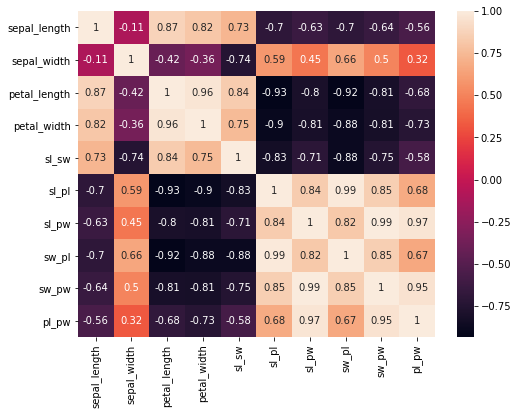

In [170]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(['species'], axis=1).corr(), annot=True)

In [171]:
df.drop(['species'], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,species,sl_sw,sl_pl,sl_pw,sw_pl,sw_pw,pl_pw
0,5.1,3.5,1.4,0.2,Iris-setosa,1.457143,3.642857,25.500000,2.500000,17.500000,7.000000
1,4.9,3.0,1.4,0.2,Iris-setosa,1.633333,3.500000,24.500000,2.142857,15.000000,7.000000
2,4.7,3.2,1.3,0.2,Iris-setosa,1.468750,3.615385,23.500000,2.461538,16.000000,6.500000
3,4.6,3.1,1.5,0.2,Iris-setosa,1.483871,3.066667,23.000000,2.066667,15.500000,7.500000
4,5.0,3.6,1.4,0.2,Iris-setosa,1.388889,3.571429,25.000000,2.571429,18.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2.233333,1.288462,2.913043,0.576923,1.304348,2.260870
146,6.3,2.5,5.0,1.9,Iris-virginica,2.520000,1.260000,3.315789,0.500000,1.315789,2.631579
147,6.5,3.0,5.2,2.0,Iris-virginica,2.166667,1.250000,3.250000,0.576923,1.500000,2.600000
148,6.2,3.4,5.4,2.3,Iris-virginica,1.823529,1.148148,2.695652,0.629630,1.478261,2.347826


In [172]:
# X = df.iloc[:, :3].values
X = df.drop(['species'], axis=1).values
# y = df.iloc[:, -1].values
y = df['species'].values
print(X.shape, y.shape)

(150, 10) (150,)


In [173]:
# y1 = LabelEncoder().fit_transform(y)
# Y = pd.get_dummies(y1).values

Y = LabelEncoder().fit_transform(y)

In [174]:
X.shape, Y.shape
# X, Y

((150, 10), (150,))

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.4)

In [176]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(64)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [177]:
X_train.shape, y_train.shape

((60, 10), (60,))

In [178]:
# model = tf.keras.models.Sequential([
#     Dense(16, activation='tanh'),
#     Dense(16, activation='tanh'),
#     Dense(3, activation='softmax')
# ])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, batch_size=16, epochs=500)

model = tf.keras.Sequential([
    Dense(units = 32, activation = 'tanh', kernel_regularizer='l1'),
    Dense(units = 64, activation = 'tanh', kernel_regularizer='l1'),
    tf.keras.layers.BatchNormalization(),
    Dense(units = 128, activation = 'tanh', kernel_regularizer='l1'),
    Dropout(0.5),
    Dense(units = 64, activation = 'tanh', kernel_regularizer='l1'),
    Dropout(0.5),
    Dense(units = 32, activation = 'tanh', kernel_regularizer='l1'),
    Dropout(0.7),
    Dense(units = 16, activation = 'tanh', kernel_regularizer='l1'),
    Dense(units = 8, activation = 'tanh', kernel_regularizer='l1'),
    Dense(units = 3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_ds, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 797ms/step - loss: 22.7899 - accuracy: 0.2000
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 22.7839 - accuracy: 0.1667
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 22.3286 - accuracy: 0.4667
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 22.1245 - accuracy: 0.4167
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 21.8752 - accuracy: 0.5667
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 21.8747 - accuracy: 0.4833
Epoch 7/300
1/1 [==============================] - 0s 15ms/step - loss: 21.6500 - accuracy: 0.5167
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 21.3045 - accuracy: 0.6667
Epoch 9/300
1/1 [==============================] - 0s 14ms/step - loss: 21.2823 - accuracy: 0.6667
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 21.1600 - accuracy: 0.7333
Epoch 11

1/1 [==============================] - 0s 10ms/step - loss: 11.3845 - accuracy: 0.9167
Epoch 83/300
1/1 [==============================] - 0s 14ms/step - loss: 11.2267 - accuracy: 0.9500
Epoch 84/300
1/1 [==============================] - 0s 11ms/step - loss: 11.0869 - accuracy: 0.9667
Epoch 85/300
1/1 [==============================] - 0s 11ms/step - loss: 10.9650 - accuracy: 0.9500
Epoch 86/300
1/1 [==============================] - 0s 13ms/step - loss: 10.8106 - accuracy: 0.9667
Epoch 87/300
1/1 [==============================] - 0s 12ms/step - loss: 10.7661 - accuracy: 0.9667
Epoch 88/300
1/1 [==============================] - 0s 11ms/step - loss: 10.6516 - accuracy: 0.9000
Epoch 89/300
1/1 [==============================] - 0s 13ms/step - loss: 10.4890 - accuracy: 0.9667
Epoch 90/300
1/1 [==============================] - 0s 13ms/step - loss: 10.4608 - accuracy: 0.9333
Epoch 91/300
1/1 [==============================] - 0s 10ms/step - loss: 10.2901 - accuracy: 0.9333
Epoch 92/300


1/1 [==============================] - 0s 9ms/step - loss: 4.3102 - accuracy: 1.0000
Epoch 165/300
1/1 [==============================] - 0s 11ms/step - loss: 4.2278 - accuracy: 1.0000
Epoch 166/300
1/1 [==============================] - 0s 12ms/step - loss: 4.1704 - accuracy: 1.0000
Epoch 167/300
1/1 [==============================] - 0s 12ms/step - loss: 4.1826 - accuracy: 0.9833
Epoch 168/300
1/1 [==============================] - 0s 12ms/step - loss: 4.0918 - accuracy: 0.9833
Epoch 169/300
1/1 [==============================] - 0s 13ms/step - loss: 4.0250 - accuracy: 0.9833
Epoch 170/300
1/1 [==============================] - 0s 10ms/step - loss: 3.9838 - accuracy: 0.9833
Epoch 171/300
1/1 [==============================] - 0s 10ms/step - loss: 3.9596 - accuracy: 0.9833
Epoch 172/300
1/1 [==============================] - 0s 10ms/step - loss: 3.8743 - accuracy: 0.9833
Epoch 173/300
1/1 [==============================] - 0s 12ms/step - loss: 3.8695 - accuracy: 1.0000
Epoch 174/300
1

1/1 [==============================] - 0s 13ms/step - loss: 2.1378 - accuracy: 0.9500
Epoch 247/300
1/1 [==============================] - 0s 16ms/step - loss: 2.1202 - accuracy: 0.9667
Epoch 248/300
1/1 [==============================] - 0s 16ms/step - loss: 2.0966 - accuracy: 0.9833
Epoch 249/300
1/1 [==============================] - 0s 15ms/step - loss: 2.0942 - accuracy: 0.9667
Epoch 250/300
1/1 [==============================] - 0s 15ms/step - loss: 2.0705 - accuracy: 1.0000
Epoch 251/300
1/1 [==============================] - 0s 13ms/step - loss: 2.1035 - accuracy: 0.9833
Epoch 252/300
1/1 [==============================] - 0s 15ms/step - loss: 2.0312 - accuracy: 0.9833
Epoch 253/300
1/1 [==============================] - 0s 15ms/step - loss: 2.0370 - accuracy: 0.9667
Epoch 254/300
1/1 [==============================] - 0s 14ms/step - loss: 2.0408 - accuracy: 1.0000
Epoch 255/300
1/1 [==============================] - 0s 10ms/step - loss: 2.0326 - accuracy: 0.9667
Epoch 256/300


In [179]:
# model.summary()

In [180]:
loss, accuracy = model.evaluate(test_ds, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.123939275741577
Test accuracy: 0.7666666507720947


In [181]:
y_pred = model.predict(X_test)
# actual = np.argmax(y_test,axis=1)
# predicted = np.argmax(y_pred,axis=1)
actual = y_test[:20]
predicted = y_pred[:20]
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [0 1 2 2 1 1 1 2 0 2 0 0 2 1 1 1 2 2 2 0]
Predicted: [[ 1.6566564  -1.4149318   0.04331907]
 [-0.03496245  0.16233689 -0.06302337]
 [ 0.3021736  -1.0020471   1.942433  ]
 [ 0.29278517 -0.93817824  1.8181013 ]
 [ 0.22898936 -0.72072154  1.4545916 ]
 [ 0.21726888 -0.7151345   1.4665364 ]
 [-0.00460191 -0.01739703  0.29913688]
 [ 0.25767946 -0.79006946  1.553931  ]
 [ 1.6571242  -1.4167092   0.0463958 ]
 [ 0.30852953 -1.0922508   2.1299455 ]
 [ 1.6512475  -1.4048343   0.03136595]
 [ 1.6530229  -1.4113762   0.04258522]
 [ 0.22740303 -0.82615185  1.7000545 ]
 [ 0.12601045 -0.32585147  0.75002694]
 [ 0.05729859 -0.26038486  0.7426131 ]
 [ 0.09256586 -0.14205702  0.38594565]
 [ 0.33923474 -1.0750599   2.029024  ]
 [ 0.30314445 -0.97050214  1.8694383 ]
 [ 0.3295287  -1.1741037   2.266501  ]
 [ 1.6044718  -1.3531513   0.00858917]]
